# Importing Libraries

In [8]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 8.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 10.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 6.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: /Users/anmolsinghnegi/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 MB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 3.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
from transformers import AutoTokenizer

In [7]:
from transformers import AutoModelForSequenceClassification


In [8]:
from scipy.special import softmax

In [9]:
import torch


In [10]:
from tqdm.notebook import tqdm 

## Downloading Pre Trained Model

In [12]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


## Importing Preprocessed Module

(500, 10)


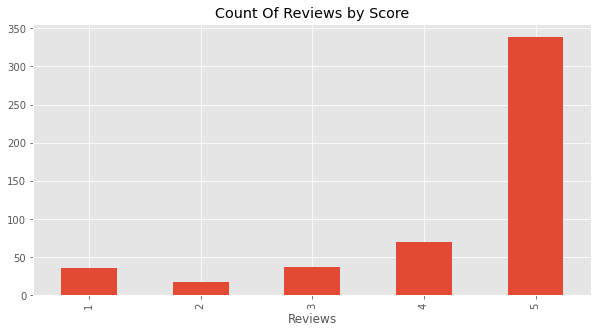

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/anmolsinghnegi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/anmolsinghnegi/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/anmolsinghnegi/nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [16]:
import Amazon_Reviews as td

In [17]:
print(td.example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [18]:
#Encoding text that model understand
tokenizer(td.example,return_tensors='pt')

{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [19]:
encoded_text=tokenizer(td.example,return_tensors='pt')

In [20]:
#run for roberta
output =model(**encoded_text)
output
# generates a tenser

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [22]:
#conveting in numpy array
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores

array([0.97635514, 0.02068747, 0.00295737], dtype=float32)

In [25]:
 # array = [neg,neu,pos]
scores_dict={
    'roberta-neg':scores[0],
    'roberta-neu':scores[1],
    'roberta-pos':scores[2]
}
print(sentiment_dict)

{'roberta-neg': 0.97635514, 'roberta-neu': 0.020687466, 'roberta-pos': 0.0029573687}


## Run on Whole Data

In [79]:
def polarity_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt', max_length=512, truncation=True)
    output =model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores
    scores_dict={
    'roberta-neg':scores[0],
    'roberta-neu':scores[1],
    'roberta-pos':scores[2],
    'roberta-compound':(scores[2]+scores[1]-scores[0])
    }
    return scores_dict

In [80]:
td.df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [81]:
df = td.df

In [82]:
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    myid=row['Id']
    robeta_result= polarity_roberta(text)
    break

  0%|          | 0/500 [00:00<?, ?it/s]

In [83]:
 robeta_result

{'roberta-neg': 0.009624222,
 'roberta-neu': 0.04998037,
 'roberta-pos': 0.9403955,
 'roberta-compound': 0.9807516}

In [84]:
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    myid=row['Id']
    res[myid]=polarity_roberta(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [85]:
res

{1: {'roberta-neg': 0.009624222,
  'roberta-neu': 0.04998037,
  'roberta-pos': 0.9403955,
  'roberta-compound': 0.9807516},
 2: {'roberta-neg': 0.508986,
  'roberta-neu': 0.45241362,
  'roberta-pos': 0.038600348,
  'roberta-compound': -0.017972022},
 3: {'roberta-neg': 0.0032289028,
  'roberta-neu': 0.098067455,
  'roberta-pos': 0.89870363,
  'roberta-compound': 0.9935422},
 4: {'roberta-neg': 0.0022951267,
  'roberta-neu': 0.0902192,
  'roberta-pos': 0.9074856,
  'roberta-compound': 0.99540967},
 5: {'roberta-neg': 0.0016347287,
  'roberta-neu': 0.010302464,
  'roberta-pos': 0.9880629,
  'roberta-compound': 0.9967307},
 6: {'roberta-neg': 0.0061295903,
  'roberta-neu': 0.02179586,
  'roberta-pos': 0.9720746,
  'roberta-compound': 0.98774093},
 7: {'roberta-neg': 0.0013047534,
  'roberta-neu': 0.007773786,
  'roberta-pos': 0.9909215,
  'roberta-compound': 0.9973905},
 8: {'roberta-neg': 0.0020293565,
  'roberta-neu': 0.0056852,
  'roberta-pos': 0.9922856,
  'roberta-compound': 0.995941

In [86]:
pd.DataFrame(res)

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
roberta-neg,0.009624,0.508986,0.003229,0.002295,0.001635,0.006130,0.001305,0.002029,0.003874,0.003103,...,0.607271,0.002051,0.177500,0.295178,0.004486,0.001906,0.004415,0.006427,0.865614,0.002440
roberta-neu,0.049980,0.452414,0.098067,0.090219,0.010302,0.021796,0.007774,0.005685,0.094156,0.055912,...,0.282183,0.013805,0.309461,0.535521,0.027289,0.009862,0.034215,0.074537,0.119366,0.011327
roberta-pos,0.940395,0.038600,0.898704,0.907486,0.988063,0.972075,0.990921,0.992286,0.901970,0.940984,...,0.110546,0.984144,0.513039,0.169301,0.968225,0.988232,0.961369,0.919036,0.015020,0.986233
roberta-compound,0.980752,-0.017972,0.993542,0.995410,0.996731,0.987741,0.997391,0.995941,0.992253,0.993793,...,-0.214542,0.995897,0.644999,0.409644,0.991028,0.996187,0.991169,0.987147,-0.731229,0.995121


In [87]:
#flipping data horizontally
pd.DataFrame(res).T

,roberta-neg,roberta-neu,roberta-pos,roberta-compound
1,0.009624,0.049980,0.940395,0.980752
2,0.508986,0.452414,0.038600,-0.017972
3,0.003229,0.098067,0.898704,0.993542
4,0.002295,0.090219,0.907486,0.995410
5,0.001635,0.010302,0.988063,0.996731
...,...,...,...,...
496,0.001906,0.009862,0.988232,0.996187
497,0.004415,0.034215,0.961369,0.991169
498,0.006427,0.074537,0.919036,0.987147
499,0.865614,0.119366,0.015020,-0.731229


In [88]:
roberta= pd.DataFrame(res).T
roberta=roberta.reset_index()\
.rename(columns={'index':'Id'})
#one column name shoulb be same for merge

In [89]:
roberta

,Id,roberta-neg,roberta-neu,roberta-pos,roberta-compound
0,1,0.009624,0.049980,0.940395,0.980752
1,2,0.508986,0.452414,0.038600,-0.017972
2,3,0.003229,0.098067,0.898704,0.993542
3,4,0.002295,0.090219,0.907486,0.995410
4,5,0.001635,0.010302,0.988063,0.996731
...,...,...,...,...,...
495,496,0.001906,0.009862,0.988232,0.996187
496,497,0.004415,0.034215,0.961369,0.991169
497,498,0.006427,0.074537,0.919036,0.987147
498,499,0.865614,0.119366,0.015020,-0.731229


In [90]:
roberta= roberta.merge(df,how='left')

In [91]:
roberta

,Id,roberta-neg,roberta-neu,roberta-pos,roberta-compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.009624,0.049980,0.940395,0.980752,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.508986,0.452414,0.038600,-0.017972,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.003229,0.098067,0.898704,0.993542,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.002295,0.090219,0.907486,0.995410,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.001635,0.010302,0.988063,0.996731,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.001906,0.009862,0.988232,0.996187,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.004415,0.034215,0.961369,0.991169,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.006427,0.074537,0.919036,0.987147,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.865614,0.119366,0.015020,-0.731229,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [92]:
roberta.head()

,Id,roberta-neg,roberta-neu,roberta-pos,roberta-compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.009624,0.049980,0.940395,0.980752,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.508986,0.452414,0.038600,-0.017972,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.003229,0.098067,0.898704,0.993542,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.002295,0.090219,0.907486,0.995410,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.001635,0.010302,0.988063,0.996731,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


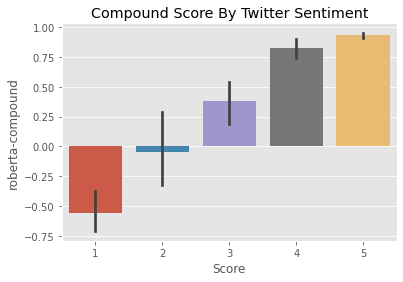

In [93]:
ax=sns.barplot(data=roberta,x='Score',y='roberta-compound')
ax.set_title('Compound Score By Twitter Sentiment')
plt.show()

ValueError: Could not interpret input 'sentiment'

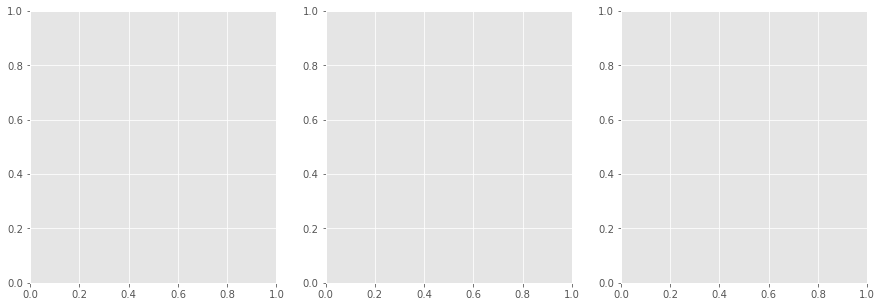

In [95]:
fig, axs=plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=roberta,x='Score',y='roberta-pos',ax=axs[0])
sns.barplot(data=roberta,x='Score',y='roberta-neu',ax=axs[1])
sns.barplot(data=roberta,x='Scor',y='roberta-neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()